In [23]:
pip install -U scikit-learn
pip install holidays
pip install seaborn matplotlib scikit-learn umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 4.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# airportal/holidays_with_weather.csv.zip 압축 해제 후 new_data라는 dataframe으로 불러오면 됩니다.

In [36]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import preprocessing
from datetime import datetime
import holidays


In [60]:
new_data.to_csv("holidays_with_weather.csv", index=False)

In [62]:
new_data.columns.tolist()

['년',
 '월',
 '일',
 '항공사',
 '편명',
 '출발지',
 '예상_1',
 '예상_2',
 '도착_1',
 '도착_2',
 '현황',
 '예상_승객',
 '운행_편수',
 'Count',
 '가시거리',
 '온도',
 '풍속']

In [64]:
import seaborn as sns
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/opt/homebrew/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [70]:
new_data['현황'].unique()

array([1, 0, 2])

/opt/homebrew/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54889 (\N{HANGUL SYLLABLE HWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


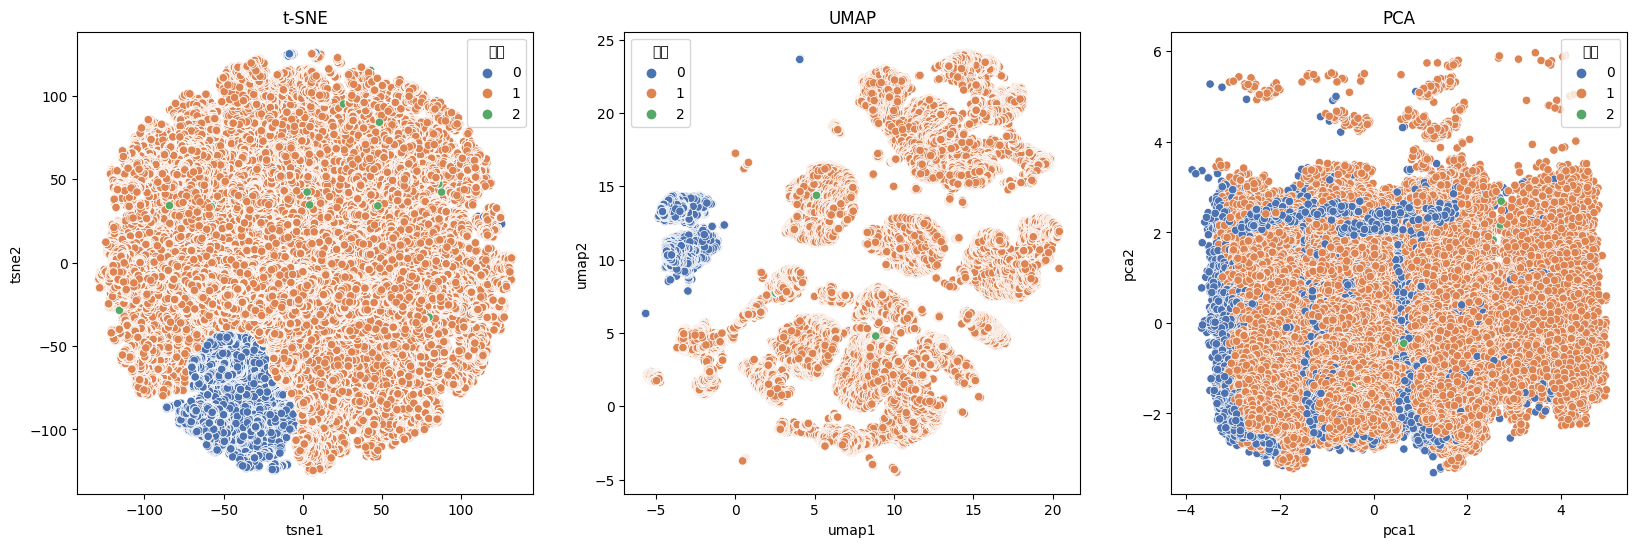

In [68]:
# 원본 데이터 분석을 위해 복사본 생성
data_vis = new_data.copy()

# 수치형 특성 선택 및 스케일
num_features = ['년',
 '월',
 '일',
 '항공사',
 '편명',
 '출발지',
 '예상_1',
 '예상_2',
 '도착_1',
 '도착_2',
 '현황',
 '예상_승객',
 '운행_편수',
 'Count',
 '가시거리',
 '온도',
 '풍속']
 
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_vis[num_features]), columns=num_features)

# t-SNE 차원 축소
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(scaled_data)
df_tsne = pd.concat([pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2']), data_vis['현황']], axis=1)

# UMAP 차원 축소
reducer = umap.UMAP()
umap_result = reducer.fit_transform(scaled_data)
df_umap = pd.concat([pd.DataFrame(umap_result, columns=['umap1', 'umap2']), data_vis['현황']], axis=1)

# PCA 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_pca = pd.concat([pd.DataFrame(pca_result, columns=['pca1', 'pca2']), data_vis['현황']], axis=1)

# 시각화 (t-SNE, UMAP, PCA 결과 시각화)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(ax=axes[0], data=df_tsne, x='tsne1', y='tsne2', hue='현황', palette="deep")
axes[0].set_title("t-SNE")

sns.scatterplot(ax=axes[1], data=df_umap, x='umap1', y='umap2', hue='현황', palette="deep")
axes[1].set_title("UMAP")

sns.scatterplot(ax=axes[2], data=df_pca, x='pca1', y='pca2', hue='현황', palette="deep")
axes[2].set_title("PCA")

plt.show()